In [2]:
import scipy.cluster.hierarchy as shc
mergings = shc.linkage(data, method='complete')

NameError: name 'data' is not defined

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
tdm_df=pd.read_csv('fashion_count_tdm.csv',encoding='utf-8')


# 분류 확인 시각화
# from sklearn.cluster import AgglomerativeClustering
# cluster=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage='ward')
# cluster.fit_predict(tdm_df)
# plt.figure(figsize=(10,7))
# plt.scatter(tdm_df.iloc[:,10],tdm_df.iloc[:,100],c=cluster.labels_,cmap='rainbow')
# plt.show()

# dendrogram 그리기
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(100,30))
plt.title('video type dendograms')
dend=shc.dendrogram(shc.linkage(tdm_df,method='ward')) #method 설정 가능
tdm_df.iloc[:,0]

# n개 군집까지 클러스터링 하기
predict=pd.DataFrame(shc.fcluster(shc.linkage(tdm_df,method='ward'),13,criterion='distance'))
predict.columns=['predict']
predict

In [3]:
import pandas as pd # dataset load
from sklearn.datasets import load_iris
# 계층적 군집 model
from scipy.cluster.hierarchy import linkage, dendrogram

In [10]:
iris = pd.read_csv("./iris.csv")
iris.info()

cols = list(iris.columns)
iris_x = iris[cols[:4]]
iris_x.head()

 

iris['Species'].value_counts() # 'Species' : y변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [7]:
X, y = load_iris(return_X_y=True)

In [8]:
labels = pd.DataFrame(y, columns = ['labels'])

In [11]:
# df = df + df
irisDF = pd.concat([iris_x, labels], axis = 1)
irisDF.head()
irisDF.tail()  # x변수들과 수치화된 y변수(labels)로 데이터프레임 만들어진 것을 확인

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [15]:
clusters = linkage(y=irisDF, method='complete', metric='euclidean')
clusters
clusters.shape # (149, 4)

(149, 4)

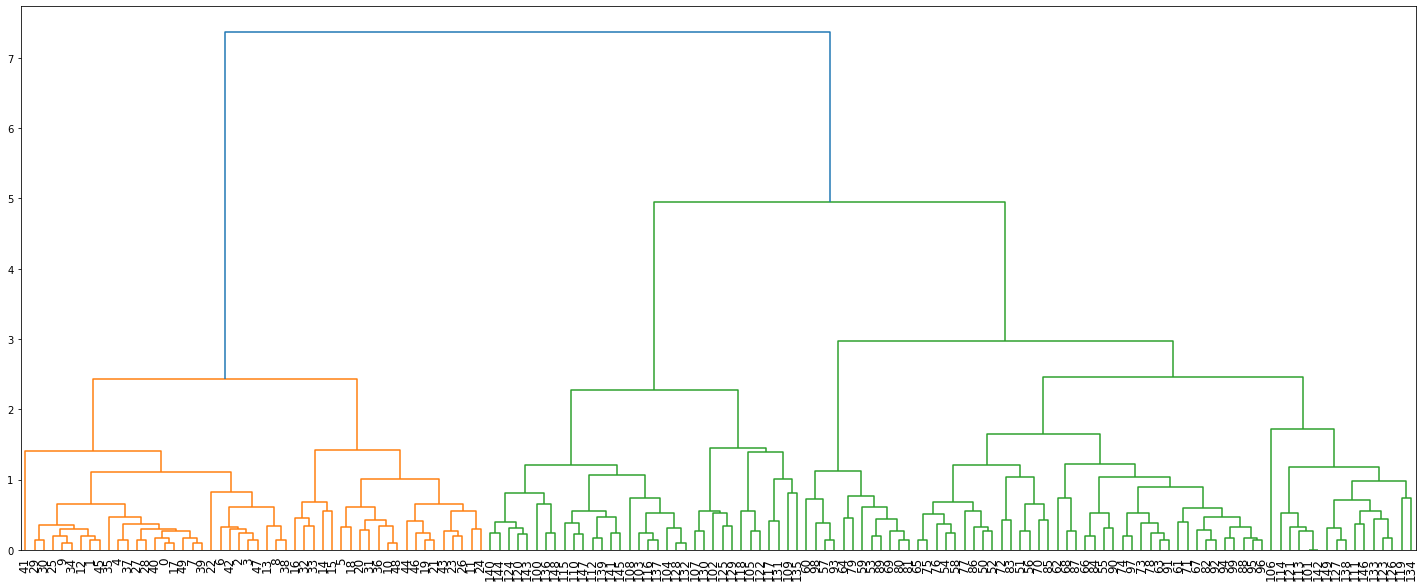

In [17]:
import matplotlib.pyplot as plt
plt.figure( figsize= (25, 10))
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)  

# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

2. kMeans

In [19]:
import pandas as pd # dataset load
from sklearn.cluster import KMeans # model
import matplotlib.pyplot as plt # 시각화

In [21]:
iris = pd.read_csv("./iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
irisDF = iris[['Sepal.Length', 'Petal.Length']]  # 두 개의 칼럼만 이용
irisDF.head()

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [23]:
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [24]:
pred = model.predict(irisDF)
pred
len(pred) # 150 (관측치 개수만큼 예측치 생성됨)

150

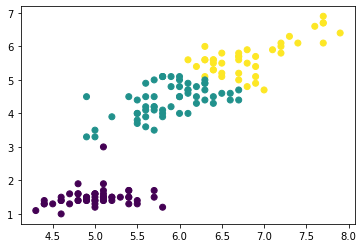

In [25]:
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'], c=pred)

In [26]:
centers = model.cluster_centers_
centers

array([[5.00784314, 1.49215686],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

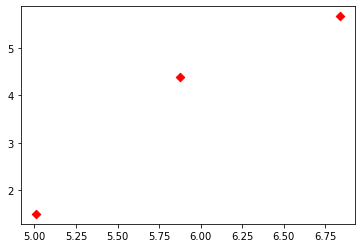

In [27]:
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

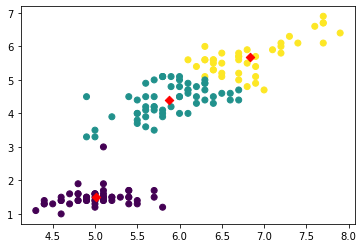

In [28]:
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'], c=pred) 

plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show() 

# LDA

In [42]:
import pandas as pd
# import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
data = pd.read_csv('movie.csv', error_bad_lines=False)
print('영화 개수 :',len(data))

영화 개수 : 14672


In [40]:
type(text)

pandas.core.frame.DataFrame

In [39]:
text = data[['synopsis']]
text

,synopsis
0,엄마가 돌아가시고 얼마 지나지 않아 닥친 태풍 소식에 5명의 형제들은 함께 산소를 ...
1,19세기 외딴 황무지에 세상과 단절된 채 살아가는 가족이 있다. 이 집의 어린 아들...
2,자격 정지 처분을 받은 NFL 감독 숀 페이턴. 아들이 선수로 뛰는 형편없는 유소년...
3,자칭 고려 제일검인 의적단 두목 무치와 바다를 평정한 해적선의 주인 해랑. 한 배에...
4,"‘해리포터와 마법사의 돌' 20주년 기념 스페셜. 다니엘 래드클리프, 루퍼트 그린트..."
...,...
14667,A jealous stump threatens two trees that are i...
14668,부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기...
14669,영화는 노동자인 프레드와 그의 부인 에밀리가 그들이 살아있는 동안 평생 뭐든지 할 ...
14670,"금주령 시대, 탐 파워스는 술집, 당구장 등을 어슬렁대며 퍼티 노우즈 같은 불량한 ..."


In [43]:
text['synopsis'] = text.apply(lambda row: nltk.word_tokenize(row['synopsis']), axis=1)

<ipython-input-43-bf44b9aaf026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['synopsis'] = text.apply(lambda row: nltk.word_tokenize(row['synopsis']), axis=1)


In [44]:
print(text.head(5))

                                            synopsis
0  [엄마가, 돌아가시고, 얼마, 지나지, 않아, 닥친, 태풍, 소식에, 5명의, 형제...
1  [19세기, 외딴, 황무지에, 세상과, 단절된, 채, 살아가는, 가족이, 있다, ....
2  [자격, 정지, 처분을, 받은, NFL, 감독, 숀, 페이턴, ., 아들이, 선수로...
3  [자칭, 고려, 제일검인, 의적단, 두목, 무치와, 바다를, 평정한, 해적선의, 주...
4  [‘, 해리포터와, 마법사의, 돌, ', 20주년, 기념, 스페셜, ., 다니엘, ...


In [45]:
stop_words = stopwords.words('english')
text['synopsis'] = text['synopsis'].apply(lambda x: [word for word in x if word not in (stop_words)])

<ipython-input-45-0d477f16290b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['synopsis'] = text['synopsis'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [46]:
text['synopsis'] = text['synopsis'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                            synopsis
0  [엄마가, 돌아가시고, 얼마, 지나지, 않아, 닥친, 태풍, 소식에, 5명의, 형제...
1  [19세기, 외딴, 황무지에, 세상과, 단절된, 채, 살아가는, 가족이, 있다, ....
2  [자격, 정지, 처분을, 받은, NFL, 감독, 숀, 페이턴, ., 아들이, 선수로...
3  [자칭, 고려, 제일검인, 의적단, 두목, 무치와, 바다를, 평정한, 해적선의, 주...
4  [‘, 해리포터와, 마법사의, 돌, ', 20주년, 기념, 스페셜, ., 다니엘, ...


<ipython-input-46-fe48dae4c2c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['synopsis'] = text['synopsis'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [48]:
tokenized_doc = text['synopsis'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0         [돌아가시고, 형제들은, 찾아간다, 온데간데, 사라졌다, 돌아오자, 기다리는데]
1          [19세기, 황무지에, 살아가는, 디에고는, 공포심을, 괴물로부터, 어머니를]
2                             [형편없는, 풋볼팀을, 감독한다, 가까워질]
3    [제일검인, 해적선의, 함께하게, 이들이지만, 태생부터, 상극으로, 사사건건, 부딪...
4    [해리포터와, 마법사의, 20주년, 래드클리프, 감독들이, 재결합해, 해리포터, 프...
Name: synopsis, dtype: object


역토큰화 작업 해줘야 함

In [50]:
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
# 다시 text['synopsis']
text['synopsis'] = detokenized_doc

<ipython-input-50-5a1b85d64b3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['synopsis'] = detokenized_doc


In [51]:
text['synopsis'][:5]

0                 돌아가시고 형제들은 찾아간다 온데간데 사라졌다 돌아오자 기다리는데
1                  19세기 황무지에 살아가는 디에고는 공포심을 괴물로부터 어머니를
2                                  형편없는 풋볼팀을 감독한다 가까워질
3    제일검인 해적선의 함께하게 이들이지만 태생부터 상극으로 사사건건 부딪히며 이어간다 ...
4    해리포터와 마법사의 20주년 래드클리프 감독들이 재결합해 해리포터 프랜차이즈의 회고...
Name: synopsis, dtype: object

In [52]:
# 상위 1,000개의 단어를 보존 
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(text['synopsis'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (14672, 1000)


In [53]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=33, max_iter=1)

In [55]:
lda_top = lda_model.fit_transform(X)

In [56]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[16.17637544  0.10031168  0.1003743  ...  0.10035397  0.10294901
   0.10042693]
 [ 0.10042459  0.10037975  0.10034452 ...  0.10042619  0.10044582
   0.10044497]
 [ 0.10039445  0.10044932  0.10068158 ...  0.10037009  0.10042083
   0.10035924]
 ...
 [ 0.1003996   0.10032042  0.10032207 ... 31.10212165  0.10042454
  15.8537648 ]
 [ 0.10042542  0.10048186  7.84415993 ...  0.10057981  0.10038562
   0.10045574]
 [ 0.10248677  0.10036522  0.10038483 ...  0.10047863  0.10033087
   0.10035509]]
(10, 1000)


In [58]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('그곳에서', 166.96), ('결심한다', 107.21), ('발견하고', 97.6), ('살아가는', 87.35), ('발견하게', 86.82), ('친구들과', 86.37), ('아버지를', 73.73), ('기다리고', 72.17), ('부탁한다', 61.86), ('아버지와', 58.02)]
Topic 2: [('그녀에게', 169.14), ('사랑하는', 139.85), ('찾아간다', 90.46), ('도움으로', 82.77), ('되는데', 80.1), ('들어간다', 70.52), ('매력적인', 69.75), ('하는데', 65.38), ('평화로운', 59.48), ('용의자로', 58.03)]
Topic 3: [('아이들을', 76.15), ('좋아하는', 73.39), ('시작하는데', 63.28), ('빠져든다', 59.02), ('운영하는', 57.46), ('mickey', 56.38), ('살아남은', 55.26), ('가까스로', 53.66), ('young', 46.45), ('come', 45.3)]
Topic 4: [('아름다운', 147.87), ('사람들이', 112.47), ('나타난다', 110.76), ('자신들의', 95.8), ('사이에서', 79.15), ('서로에게', 76.66), ('마을에서', 69.27), ('친구들은', 67.52), ('시작한다', 59.94), ('어머니의', 59.89)]
Topic 5: [('순식간에', 73.01), ('세상에서', 61.7), ('발견된다', 55.42), ('제안한다', 53.27), ('우여곡절', 52.95), ('결심하고', 49.4), ('홍콩으로', 44.55), ('세계에서', 43.26), ('보여준다', 40.68), ('조사하던', 39.32)]
Topic 6: [('아버지의', 164.36), ('시작된다', 151.92), ('불구하고', 90.12), ('아버지는', 79.89), ('크리스마스', 70.9), 

잠재 디리클레 할당 (LDA)

In [59]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [60]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [61]:
# 전처리
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-61-74de764bbffc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [63]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [64]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [ ]:
# !pip install gensim

In [67]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [68]:
print(dictionary[66])

faith


In [69]:
len(dictionary)

64281

In [70]:
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.015*"like" + 0.012*"know" + 0.010*"time" + 0.009*"would"')
(1, '0.050*"file" + 0.028*"entry" + 0.028*"output" + 0.025*"window"')
(2, '0.020*"ripem" + 0.011*"part" + 0.011*"cryptography" + 0.009*"public"')
(3, '0.045*"space" + 0.016*"nasa" + 0.010*"launch" + 0.009*"earth"')
(4, '0.010*"university" + 0.010*"information" + 0.008*"research" + 0.008*"mail"')
(5, '0.015*"would" + 0.011*"people" + 0.010*"think" + 0.007*"know"')
(6, '0.012*"available" + 0.010*"data" + 0.009*"files" + 0.008*"information"')
(7, '0.025*"armenian" + 0.021*"armenians" + 0.018*"turkish" + 0.011*"turkey"')
(8, '0.012*"power" + 0.010*"ground" + 0.009*"engine" + 0.009*"wire"')
(9, '0.023*"church" + 0.009*"john" + 0.007*"catholic" + 0.005*"pope"')
(10, '0.015*"thanks" + 0.015*"would" + 0.013*"drive" + 0.013*"know"')
(11, '0.015*"islam" + 0.008*"candida" + 0.007*"sabbath" + 0.007*"muslims"')
(12, '0.011*"health" + 0.010*"medical" + 0.008*"disease" + 0.007*"years"')
(13, '0.021*"game" + 0.019*"team" + 0.014*"play" 

In [71]:
print(ldamodel.print_topics())

[(0, '0.015*"like" + 0.012*"know" + 0.010*"time" + 0.009*"would" + 0.009*"said" + 0.009*"back" + 0.009*"think" + 0.008*"well" + 0.008*"going" + 0.007*"people"'), (1, '0.050*"file" + 0.028*"entry" + 0.028*"output" + 0.025*"window" + 0.021*"program" + 0.013*"section" + 0.013*"line" + 0.013*"build" + 0.010*"check" + 0.010*"rules"'), (2, '0.020*"ripem" + 0.011*"part" + 0.011*"cryptography" + 0.009*"public" + 0.009*"crypt" + 0.007*"cipher" + 0.007*"food" + 0.007*"random" + 0.007*"rockefeller" + 0.006*"cryptographic"'), (3, '0.045*"space" + 0.016*"nasa" + 0.010*"launch" + 0.009*"earth" + 0.008*"satellite" + 0.007*"shuttle" + 0.007*"orbit" + 0.007*"mission" + 0.006*"lunar" + 0.006*"flight"'), (4, '0.010*"university" + 0.010*"information" + 0.008*"research" + 0.008*"mail" + 0.008*"send" + 0.007*"list" + 0.007*"internet" + 0.006*"center" + 0.006*"april" + 0.006*"national"'), (5, '0.015*"would" + 0.011*"people" + 0.010*"think" + 0.007*"know" + 0.007*"like" + 0.006*"believe" + 0.006*"even" + 0.00

In [ ]:
# !pip install pyLDAvis

In [72]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)